In [1]:
import pandas as pd
import numpy as np
import loadCSV as load
import os
import utils as ut
from matplotlib import pyplot as plt


In [2]:
#Load datasets 
if os.path.isfile('temp_datalab_records_job_listings_nona.csv'):
    df = pd.read_csv('temp_datalab_records_job_listings_nona.csv', index_col=0)
else:
    #Calls a function that loads the data into chunks, cleans it to only keep relevant information and saves it in a new csv file. 
    df = load.loadCSV()

/Users/cmagri1/anaconda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_ds = ut.SelectDataJobs(df)

In [4]:
#Let's look at who has posted >500 monthly jobs over this 18 month period. 
#### Plot values
topBrands_month,topBrands_day = ut.TopBrands(df_ds, 500)

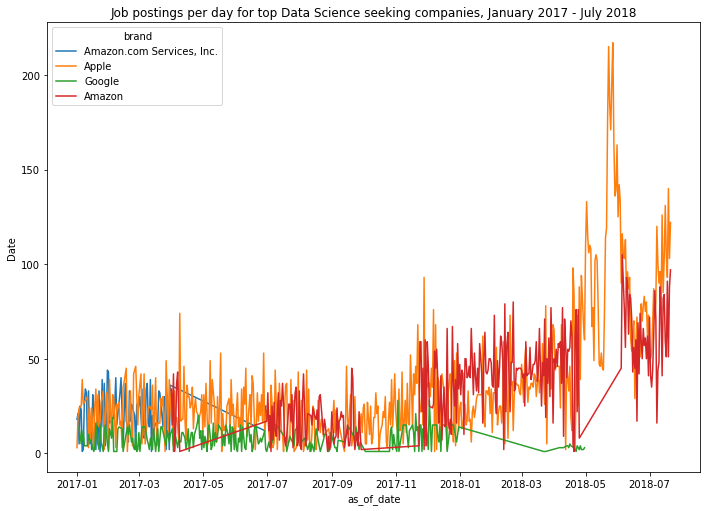

In [5]:
ut.plotTopBrands(topBrands_day)
#Apple and Amazon stand out. Amazon seems to have had an uptick. Apple also seems to be the one for which data are more complete. I'm going to look into that and relate it Amazon's to stock market values

In [6]:
merge = load.MergeStocks(topBrands_day)

In [13]:
#Only display Apple
Apple = merge[merge['brand'] == 'Apple']

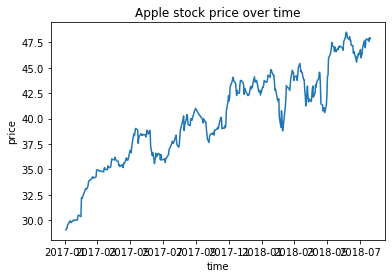

In [8]:
plt.plot(Apple.index, Apple["Close"])
plt.title("Apple stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

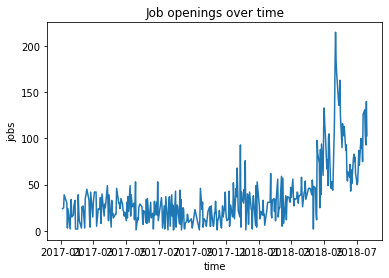

In [9]:
plt.plot(Apple.index, Apple["count"])
plt.title("Job openings over time")
plt.xlabel("time")
plt.ylabel("jobs")
plt.show()

model with lag:  -7
            brand  count       Open       High        Low      Close  \
2017-01-03  Apple     24  28.950001  29.082500  28.690001  29.037500   
2017-01-05  Apple     25  28.980000  29.215000  28.952499  29.152500   
2017-01-06  Apple     39  29.195000  29.540001  29.117500  29.477501   
2017-01-11  Apple     30  29.684999  29.982500  29.650000  29.937500   
2017-01-12  Apple      3  29.725000  29.825001  29.552500  29.812500   

            Adj Close     Volume  
2017-01-03  27.459938  115127600  
2017-01-05  27.568691   88774400  
2017-01-06  27.876030  127007600  
2017-01-11  28.311039  110354400  
2017-01-12  28.192831  108344800  
            brand  count       Open       High        Low      Close  \
2017-01-03  Apple     24  28.950001  29.082500  28.690001  29.037500   
2017-01-05  Apple     25  28.980000  29.215000  28.952499  29.152500   
2017-01-06  Apple     39  29.195000  29.540001  29.117500  29.477501   
2017-01-11  Apple     30  29.684999  29.982500  2

/Users/cmagri1/Documents/DTI-dataChallenge/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_Apple['Open_lag'] = merge_Apple['Open'].shift(lag)


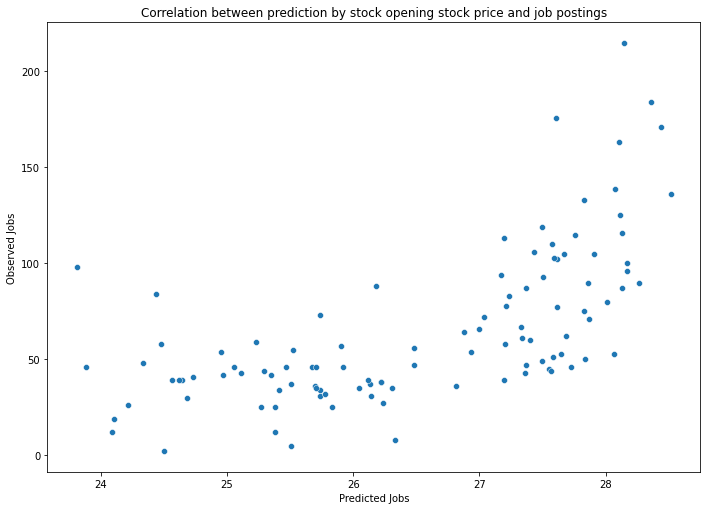

In [19]:
Apple = merge[merge['brand'] == 'Apple']
result, ypred = ut.predictJobs(Apple,lag = -7)